In [1]:
import pandas as pd
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as gmm
import numpy as np
import matplotlib.pyplot as plt

# from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from imblearn.pipeline import Pipeline
from scipy import linalg
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FactorAnalysis

#extract the reduced data
bitcoin_train_df = pd.read_csv("bitcoin_train.txt",delimiter='\t')
bitcoin_test_df = pd.read_csv("bitcoin_test.txt",delimiter='\t')
bitcoin_train_pca_reduced_df = pd.read_csv("bitcoin_train_pca_reduced.txt",delimiter='\t')
bitcoin_test_pca_reduced_df = pd.read_csv("bitcoin_test_pca_reduced.txt",delimiter='\t')
bitcoin_train_ica_reduced_df = pd.read_csv("bitcoin_train_ica_reduced.txt",delimiter='\t')
bitcoin_test_ica_reduced_df = pd.read_csv("bitcoin_test_ica_reduced.txt",delimiter='\t')
bitcoin_train_grp_reduced_df = pd.read_csv("bitcoin_train_grp_reduced.txt",delimiter='\t')
bitcoin_test_grp_reduced_df = pd.read_csv("bitcoin_test_grp_reduced.txt",delimiter='\t')
bitcoin_train_fa_reduced_df = pd.read_csv("bitcoin_train_fa_reduced.txt",delimiter='\t')
bitcoin_test_fa_reduced_df = pd.read_csv("bitcoin_test_fa_reduced.txt",delimiter='\t')

skin_train_df = pd.read_csv("skin_train.txt",delimiter='\t')
skin_test_df = pd.read_csv("skin_test.txt",delimiter='\t')
skin_train_pca_reduced_df = pd.read_csv("skin_train_pca_reduced.txt",delimiter='\t')
skin_test_pca_reduced_df = pd.read_csv("skin_test_pca_reduced.txt",delimiter='\t')
skin_train_ica_reduced_df = pd.read_csv("skin_train_ica_reduced.txt",delimiter='\t')
skin_test_ica_reduced_df = pd.read_csv("skin_test_ica_reduced.txt",delimiter='\t')
skin_train_grp_reduced_df = pd.read_csv("skin_train_grp_reduced.txt",delimiter='\t')
skin_test_grp_reduced_df = pd.read_csv("skin_test_grp_reduced.txt",delimiter='\t')
skin_train_fa_reduced_df = pd.read_csv("skin_train_fa_reduced.txt",delimiter='\t')
skin_test_fa_reduced_df = pd.read_csv("skin_test_fa_reduced.txt",delimiter='\t')





In [2]:
#transform dataframe to array
X_bitcoin_train = np.array(bitcoin_train_df.iloc[:,1:-1])
X_bitcoin_train_pca_reduced=np.array(bitcoin_train_pca_reduced_df.iloc[:,1:-1])
# y_bitcoin_train_pca_reduced = np.array(bitcoin_train_pca_reduced_df.iloc[:,-1])
X_bitcoin_train_ica_reduced=np.array(bitcoin_train_ica_reduced_df.iloc[:,1:-1])
# y_bitcoin_train_ica_reduced = np.array(bitcoin_train_ica_reduced_df.iloc[:,-1])
X_bitcoin_train_grp_reduced=np.array(bitcoin_train_grp_reduced_df.iloc[:,1:-1])
# y_bitcoin_train_grp_reduced = np.array(bitcoin_train_grp_reduced_df.iloc[:,-1])
X_bitcoin_train_fa_reduced=np.array(bitcoin_train_fa_reduced_df.iloc[:,1:-1])
# y_bitcoin_train_fa_reduced = np.array(bitcoin_train_fa_reduced_df.iloc[:,-1])
X_bitcoin_test= np.array(bitcoin_train_df.iloc[:,1:-1])
X_bitcoin_test_pca_reduced=np.array(bitcoin_test_pca_reduced_df.iloc[:,1:-1])
# y_bitcoin_train_pca_reduced = np.array(bitcoin_train_pca_reduced_df.iloc[:,-1])
X_bitcoin_test_ica_reduced=np.array(bitcoin_test_ica_reduced_df.iloc[:,1:-1])
# y_bitcoin_train_ica_reduced = np.array(bitcoin_train_ica_reduced_df.iloc[:,-1])
X_bitcoin_test_grp_reduced=np.array(bitcoin_test_grp_reduced_df.iloc[:,1:-1])
# y_bitcoin_train_grp_reduced = np.array(bitcoin_train_grp_reduced_df.iloc[:,-1])
X_bitcoin_test_fa_reduced=np.array(bitcoin_test_fa_reduced_df.iloc[:,1:-1])
# y_bitcoin_train_fa_reduced = np.array(bitcoin_train_fa_reduced_df.iloc[:,-1])
scaler = StandardScaler()
X_bitcoin_train_pca_reduced=scaler.fit_transform(X_bitcoin_train_pca_reduced)
X_bitcoin_test_pca_reduced = scaler.transform(X_bitcoin_test_pca_reduced)
scaler = StandardScaler()
X_bitcoin_train_ica_reduced=scaler.fit_transform(X_bitcoin_train_ica_reduced)
X_bitcoin_test_ica_reduced = scaler.transform(X_bitcoin_test_ica_reduced)
scaler = StandardScaler()
X_bitcoin_train_grp_reduced=scaler.fit_transform(X_bitcoin_train_grp_reduced)
X_bitcoin_test_grp_reduced = scaler.transform(X_bitcoin_test_grp_reduced)
scaler = StandardScaler()
X_bitcoin_train_fa_reduced=scaler.fit_transform(X_bitcoin_train_fa_reduced)
X_bitcoin_test_fa_reduced = scaler.transform(X_bitcoin_test_fa_reduced)

X_skin_train = np.array(skin_train_df.iloc[:,1:-1])
X_skin_train_pca_reduced=np.array(skin_train_pca_reduced_df.iloc[:,1:-1])
X_skin_test_pca_reduced=np.array(skin_test_pca_reduced_df.iloc[:,1:-1])
X_skin_train_ica_reduced=np.array(skin_train_ica_reduced_df.iloc[:,1:-1])
X_skin_test_ica_reduced = np.array(skin_test_ica_reduced_df.iloc[:,1:-1])
X_skin_train_grp_reduced=np.array(skin_train_grp_reduced_df.iloc[:,1:-1])
X_skin_test_grp_reduced=np.array(skin_test_grp_reduced_df.iloc[:,1:-1])
X_skin_train_fa_reduced=np.array(skin_train_fa_reduced_df.iloc[:,1:-1])
X_skin_test_fa_reduced=np.array(skin_test_fa_reduced_df.iloc[:,1:-1])

scaler = StandardScaler()
X_skin_train_pca_reduced=scaler.fit_transform(X_skin_train_pca_reduced)
X_skin_test_pca_reduced = scaler.transform(X_skin_test_pca_reduced)
scaler = StandardScaler()
X_skin_train_ica_reduced=scaler.fit_transform(X_skin_train_ica_reduced)
X_skin_test_ica_reduced = scaler.transform(X_skin_test_ica_reduced)
scaler = StandardScaler()
X_skin_train_grp_reduced=scaler.fit_transform(X_skin_train_grp_reduced)
X_skin_test_grp_reduced = scaler.transform(X_skin_test_grp_reduced)
scaler = StandardScaler()
X_skin_train_fa_reduced=scaler.fit_transform(X_skin_train_fa_reduced)
X_skin_test_fa_reduced = scaler.transform(X_skin_test_fa_reduced)




In [ ]:
print(bitcoin_train_ica_reduced_df.head(2))
y_bitcoin_train_ica_reduced = np.array(bitcoin_train_ica_reduced_df.iloc[:,-1])
print(y_bitcoin_train_ica_reduced.shape,np.sum(y_bitcoin_train_ica_reduced))

2
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
3
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
4
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
5
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
6
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
7
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
start to train
train finished
8
start to train
train finished
start to train
train finished
start to train
train finis

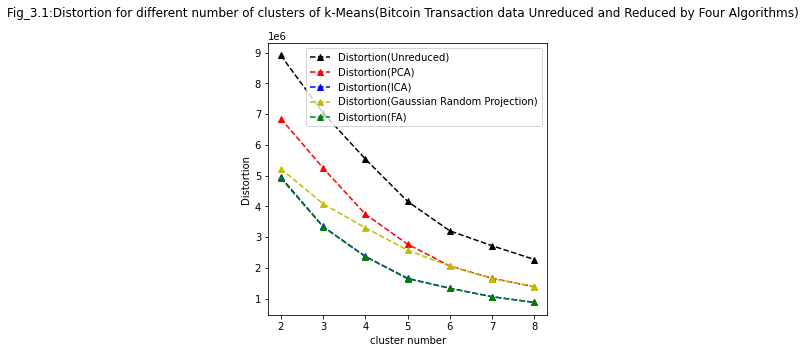

In [3]:
#########k-means on reduced bitcoin########
n_components_range = range(2, 9)
distortion_unreduced =[]
distortion_pca =[]
distortion_ica = []
distortion_grp =[]
distortion_fa =[]

distortion =[distortion_unreduced,distortion_pca,distortion_ica,distortion_grp,distortion_fa]
X_train_reduced=[X_bitcoin_train,X_bitcoin_train_pca_reduced,X_bitcoin_train_ica_reduced,X_bitcoin_train_grp_reduced,X_bitcoin_train_fa_reduced]
for n_components in n_components_range:
    print(n_components)
    t = 0
    for X_reduced in X_train_reduced:
        print("start to train")
        kmeans = KMeans(n_clusters=n_components)
        kmeans.fit(X_reduced)
        print("train finished")
        distortion[t].append(kmeans.inertia_)
        t += 1

#########plot the graph of metrics: distortion,silhouette########
fig_1,axs = plt.subplots(1,1, figsize=(5, 5), sharey=False)
axs.plot(n_components_range,distortion[0],"k^",linestyle = "--",label='Distortion(Unreduced)')
axs.plot(n_components_range,distortion[1],"r^",linestyle = "--",label='Distortion(PCA)')
axs.plot(n_components_range,distortion[2],"b^",linestyle = "--",label='Distortion(ICA)')
axs.plot(n_components_range,distortion[3],"y^",linestyle = "--",label='Distortion(Gaussian Random Projection)')
axs.plot(n_components_range,distortion[4],"g^",linestyle = "--",label='Distortion(FA)')
axs.set_xticks(n_components_range)              
axs.set_xlabel("cluster number")
axs.set_ylabel("Distortion")
axs.legend()

fig_1.suptitle("Fig_3.1:Distortion for k-Means Clusters(Bitcoin Transaction data Unreduced and Reduced by Four Algorithms)")
fig_1.savefig("Fig_3.1:Distortion for different number of clusters of k-Means(Bitcoin Transaction data Unreduced and Reduced by Four Algorithms).png")
        


In [27]:
########kmeans clustered reduced bitcoin dataset######
#############PCA###
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_bitcoin_train_pca_reduced)

train_labels= kmeans.predict(X_bitcoin_train_pca_reduced)
X_bitcoin_train_kmeans_clustered_reduced_pca_df = pd.DataFrame(np.concatenate((X_bitcoin_train_pca_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=kmeans.predict(X_bitcoin_test_pca_reduced)
X_bitcoin_test_kmeans_clustered_reduced_pca_df =  pd.DataFrame(np.concatenate((X_bitcoin_test_pca_reduced,test_labels.reshape(-1,1)),axis=1))
X_bitcoin_train_kmeans_clustered_reduced_pca_df.to_csv(r"bitcoin_train_kmeans_clustered_reduced_pca.txt",sep='\t',mode='a')
X_bitcoin_test_kmeans_clustered_reduced_pca_df.to_csv(r"bitcoin_test_kmeans_clustered_reduced_pca.txt",sep='\t',mode='a')


In [28]:
###########ICA
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_bitcoin_train_ica_reduced)
train_labels = kmeans.predict(X_bitcoin_train_ica_reduced)
X_bitcoin_train_kmeans_clustered_reduced_ica_df = pd.DataFrame(np.concatenate((X_bitcoin_train_ica_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels = kmeans.predict(X_bitcoin_test_ica_reduced)
X_bitcoin_test_kmeans_clustered_reduced_ica_df =  pd.DataFrame(np.concatenate((X_bitcoin_test_ica_reduced,test_labels.reshape(-1,1)),axis=1))
X_bitcoin_train_kmeans_clustered_reduced_ica_df.to_csv(r"bitcoin_train_kmeans_clustered_reduced_ica.txt",sep='\t',mode='a')
X_bitcoin_test_kmeans_clustered_reduced_ica_df.to_csv(r"bitcoin_test_kmeans_clustered_reduced_ica.txt",sep='\t',mode='a')

In [29]:
#############RCA########
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_bitcoin_train_grp_reduced)
train_labels = kmeans.predict(X_bitcoin_train_grp_reduced)
X_bitcoin_train_kmeans_clustered_reduced_grp_df = pd.DataFrame(np.concatenate((X_bitcoin_train_grp_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels = kmeans.predict(X_bitcoin_test_ica_reduced)
X_bitcoin_test_kmeans_clustered_reduced_grp_df =  pd.DataFrame(np.concatenate((X_bitcoin_test_grp_reduced,test_labels.reshape(-1,1)),axis=1))
X_bitcoin_train_kmeans_clustered_reduced_grp_df.to_csv(r"bitcoin_train_kmeans_clustered_reduced_grp.txt",sep='\t',mode='a')
X_bitcoin_test_kmeans_clustered_reduced_grp_df.to_csv(r"bitcoin_test_kmeans_clustered_reduced_grp.txt",sep='\t',mode='a')

In [30]:
###########FA######
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_bitcoin_train_fa_reduced)
train_labels = kmeans.predict(X_bitcoin_train_fa_reduced)
X_bitcoin_train_kmeans_clustered_reduced_fa_df = pd.DataFrame(np.concatenate((X_bitcoin_train_fa_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels = kmeans.predict(X_bitcoin_test_fa_reduced)
X_bitcoin_test_kmeans_clustered_reduced_fa_df =  pd.DataFrame(np.concatenate((X_bitcoin_test_fa_reduced,test_labels.reshape(-1,1)),axis=1))
X_bitcoin_train_kmeans_clustered_reduced_fa_df.to_csv(r"bitcoin_train_kmeans_clustered_reduced_fa.txt",sep='\t',mode='a')
X_bitcoin_test_kmeans_clustered_reduced_fa_df.to_csv(r"bitcoin_test_kmeans_clustered_reduced_fa.txt",sep='\t',mode='a')

In [4]:
# EM Algorithm on reduced bitcoin data

##########compute the BIC,BIC_gradient######
bic_unreduced=[]
bic_pca = []
bic_ica =[]
bic_grp = []
bic_fa = []
bic = [bic_unreduced,bic_pca,bic_ica,bic_grp,bic_fa]
bic_grad_unreduced=[]
bic_grad_pca = []
bic_grad_ica = []
bic_grad_grp = []
bic_grad_fa = []
bic_grad = [bic_grad_unreduced,bic_grad_pca,bic_grad_ica,bic_grad_grp,bic_grad_fa]
iterations = 5
n_components_range = range(2, 9)
X_train_reduced=[X_bitcoin_train,X_bitcoin_train_pca_reduced,X_bitcoin_train_ica_reduced,X_bitcoin_train_grp_reduced,X_bitcoin_train_fa_reduced]
for n_components in n_components_range:
    print(n_components)
    bic_temp_pca = []
    bic_temp_ica = []
    bic_temp_grp = []
    bic_temp_fa = []
    bic_temp_unreduced = []
    bic_temp = [bic_temp_unreduced,bic_temp_pca,bic_temp_ica,bic_temp_grp,bic_temp_fa]
    t = 0
    for X_reduced in X_train_reduced:
        for _ in range(iterations):
            # Fit a Gaussian mixture with EM
            GMM = gmm(n_components=n_components)
            GMM.fit(X_reduced)
            print("train finished")
            bic_temp[t].append(GMM.bic(X_reduced))
        bic[t].append(np.mean(bic_temp[t]))
        t += 1
bic_grad = [np.gradient(m) for m in bic]
               
print('******************')   
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

###############Compute the Jensen Shannon score#######
iterations = 5
n_components_range = range(2, 9)
js_unreduced=[]
js_pca =[]
js_ica = []
js_grp =[]
js_fa = []
js = [js_unreduced,js_pca,js_ica,js_grp,js_fa]

for n_components in n_components_range:
    dist_unreduced=[]
    dist_pca=[]
    dist_ica=[]
    dist_grp=[]
    dist_fa=[]
    dist=[dist_unreduced,dist_pca,dist_ica,dist_grp,dist_fa]
    t=0
    for X_reduced in X_train_reduced:
        for _ in range(iterations):
            train, test=train_test_split(X_reduced, test_size=0.5)
            gmm_train=gmm(n_components=n_components,random_state=0).fit(train) 
            gmm_test=gmm(n_components=n_components,random_state=0).fit(test) 
            print("train finished")
            dist[t].append(gmm_js(gmm_train, gmm_test))
        js[t].append(np.mean(np.array(dist[t])))
        t+=1
    
fig_2, axs = plt.subplots(1,3, figsize=(15, 5), sharey=False)
axs[0].plot(n_components_range,bic_unreduced,"k^",linestyle = "--",label='BIC(Unreduced)')
axs[0].plot(n_components_range,bic_pca,"r^",linestyle = "--",label='BIC(PCA)')
axs[0].plot(n_components_range,bic_ica,"y^",linestyle = "--",label='BIC(ICA)')
axs[0].plot(n_components_range,bic_grp,"b^",linestyle = "--",label='BIC(Gaussian Random Reduction)')
axs[0].plot(n_components_range,bic_fa,"g^",linestyle = "--",label='BIC(FA)')
axs[1].plot(n_components_range,bic_grad_unreduced,"k^",linestyle = "--",label='BIC Gradient(Unreduced)')
axs[1].plot(n_components_range,bic_grad_pca,"r^",linestyle = "--",label='BIC Gradient(PCA)')
axs[1].plot(n_components_range,bic_grad_ica,"y^",linestyle = "--",label='BIC Gradient(ICA)')
axs[1].plot(n_components_range,bic_grad_grp,"b^",linestyle = "--",label='BIC Gradient(Gaussian Random Projection)')
axs[1].plot(n_components_range,bic_grad_fa,"g^",linestyle = "--",label='BIC Gradient(FA)')
axs[2].plot(n_components_range,js_unreduced,"k^",linestyle = "--",label='Jensen Shanon(Unreduced)')
axs[2].plot(n_components_range,js_pca,"r^",linestyle = "--",label='Jensen Shanon(PCA)')
axs[2].plot(n_components_range,js_ica,"y^",linestyle = "--",label='Jensen Shanon(ICA)')
axs[2].plot(n_components_range,js_grp,"b^",linestyle = "--",label='Jensen Shanon(Gaussian Random Projection)')
axs[2].plot(n_components_range,js_fa,"g^",linestyle = "--",label='Jensen Shanon(FA)')
               
               
axs[0].set_xlabel("cluster number")
axs[0].set_ylabel("BIC")
axs[0].legend()

axs[1].set_xlabel("cluster number")
axs[1].set_ylabel("BIC Gradient")
axs[1].legend()

# axs[2].set_xlabel("cluster number")
# axs[2].set_ylabel("Silhouette")
# axs[2].legend()
               
axs[2].set_xlabel("cluster number")
axs[2].set_ylabel("Jensen Shanon(Distances between GMMS)")
axs[2].legend()
fig_2.suptitle("Fig_3.2:Metrics for GMM Clusters (Unreduced and Reduced Bitcoin data)")
fig_2.savefig("Fig_3.2:Metrics for different number of clusters of GMMs (Unreduced and Reduced Bitcoin data).png")



2
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
3
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
4
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
train finished
trai

NameError: name 'gmm_js' is not defined

In [22]:
X_bitcoin_train_pca_reduced.shape

(2187522, 4)

In [31]:
########GMM clustered reduced bitcoin dataset######
#############PCA###
GMM=gmm(n_components=4,random_state=0)

GMM.fit(X_bitcoin_train_pca_reduced)

train_labels= GMM.predict(X_bitcoin_train_pca_reduced)
X_bitcoin_train_gmm_clustered_reduced_pca_df = pd.DataFrame(np.concatenate((X_bitcoin_train_pca_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=GMM.predict(X_bitcoin_test_pca_reduced)
X_bitcoin_test_gmm_clustered_reduced_pca_df =  pd.DataFrame(np.concatenate((X_bitcoin_test_pca_reduced,test_labels.reshape(-1,1)),axis=1))
X_bitcoin_train_gmm_clustered_reduced_pca_df.to_csv(r"bitcoin_train_gmm_clustered_reduced_pca.txt",sep='\t',mode='a')
X_bitcoin_test_gmm_clustered_reduced_pca_df.to_csv(r"bitcoin_test_gmm_clustered_reduced_pca.txt",sep='\t',mode='a')


In [32]:
################ICA##########
GMM=gmm(n_components=4,random_state=0)
GMM.fit(X_bitcoin_train_ica_reduced)

train_labels= GMM.predict(X_bitcoin_train_ica_reduced)
X_bitcoin_train_gmm_clustered_reduced_ica_df = pd.DataFrame(np.concatenate((X_bitcoin_train_ica_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=GMM.predict(X_bitcoin_test_ica_reduced)
X_bitcoin_test_gmm_clustered_reduced_ica_df =  pd.DataFrame(np.concatenate((X_bitcoin_test_ica_reduced,test_labels.reshape(-1,1)),axis=1))
X_bitcoin_train_gmm_clustered_reduced_ica_df.to_csv(r"bitcoin_train_gmm_clustered_reduced_ica.txt",sep='\t',mode='a')
X_bitcoin_test_gmm_clustered_reduced_ica_df.to_csv(r"bitcoin_test_gmm_clustered_reduced_ica.txt",sep='\t',mode='a')

In [33]:
################RCA##########
GMM=gmm(n_components=6,random_state=0)
GMM.fit(X_bitcoin_train_grp_reduced)

train_labels= GMM.predict(X_bitcoin_train_grp_reduced)
X_bitcoin_train_gmm_clustered_reduced_grp_df = pd.DataFrame(np.concatenate((X_bitcoin_train_grp_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=GMM.predict(X_bitcoin_test_grp_reduced)
X_bitcoin_test_gmm_clustered_reduced_grp_df =  pd.DataFrame(np.concatenate((X_bitcoin_test_grp_reduced,test_labels.reshape(-1,1)),axis=1))
X_bitcoin_train_gmm_clustered_reduced_grp_df.to_csv(r"bitcoin_train_gmm_clustered_reduced_grp.txt",sep='\t',mode='a')
X_bitcoin_test_gmm_clustered_reduced_grp_df.to_csv(r"bitcoin_test_gmm_clustered_reduced_grp.txt",sep='\t',mode='a')

In [34]:
################FA##########
GMM=gmm(n_components=3,random_state=0)
GMM.fit(X_bitcoin_train_fa_reduced)
train_labels= GMM.predict(X_bitcoin_train_fa_reduced)
X_bitcoin_train_gmm_clustered_reduced_fa_df = pd.DataFrame(np.concatenate((X_bitcoin_train_fa_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=GMM.predict(X_bitcoin_test_fa_reduced)
X_bitcoin_test_gmm_clustered_reduced_fa_df =  pd.DataFrame(np.concatenate((X_bitcoin_test_fa_reduced,test_labels.reshape(-1,1)),axis=1))
X_bitcoin_train_gmm_clustered_reduced_fa_df.to_csv(r"bitcoin_train_gmm_clustered_reduced_fa.txt",sep='\t',mode='a')
X_bitcoin_test_gmm_clustered_reduced_fa_df.to_csv(r"bitcoin_test_gmm_clustered_reduced_fa.txt",sep='\t',mode='a')

In [ ]:
#########k-means on reduced skin data########

n_components_range = range(2, 9)
distortion_unreduced =[]
distortion_pca =[]
distortion_ica = []
distortion_grp =[]
distortion_fa =[]
X_train_reduced=[X_skin_train,X_skin_train_pca_reduced,X_skin_train_ica_reduced,X_skin_train_grp_reduced,X_skin_train_fa_reduced]
distortion =[distortion_unreduced,distortion_pca,distortion_ica,distortion_grp,distortion_fa]
for n_components in n_components_range:
    t = 0
    for X_reduced in X_train_reduced:
        print("start to train")
        kmeans = KMeans(n_clusters=n_components,random_state=1)
        print("train finished")
        kmeans.fit(X_reduced)
        distortion[t].append(kmeans.inertia_)
        t += 1

#########plot the graph of metrics: distortion,silhouette########
fig_3,axs = plt.subplots(1,1, figsize=(5, 5), sharey=False)

axs.plot(n_components_range,distortion[0],"k^",linestyle = "--",label='Distortion(Unreduced)')
axs.plot(n_components_range,distortion[1],"r^",linestyle = "--",label='Distortion(PCA)')
axs.plot(n_components_range,distortion[2],"y^",linestyle = "--",label='Distortion(ICA)')
axs.plot(n_components_range,distortion[3],"b^",linestyle = "--",label='Distortion(Gaussian Random Projection)')
axs.plot(n_components_range,distortion[4],"g^",linestyle = "--",label='Distortion(FA)')
axs.set_xticks(n_components_range)              
axs.set_xlabel("cluster number")
axs.set_ylabel("Distortion")
axs.legend()


fig_3.suptitle("Fig_3.3:Distortion of k-Means Clusters(Skin data Unreduced and Reduced)")
fig_3.savefig("Fig_3.3:Distortion for different number of clusters of k-Means(Skin data Unreduced and Reduced).png")
  

In [19]:
########kmeans clustered reduced skin dataset######
#############PCA###
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_skin_train_pca_reduced)

train_labels= kmeans.predict(X_skin_train_pca_reduced)
X_skin_train_kmeans_clustered_reduced_pca_df = pd.DataFrame(np.concatenate((X_skin_train_pca_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=kmeans.predict(X_skin_test_pca_reduced)
X_skin_test_kmeans_clustered_reduced_pca_df =  pd.DataFrame(np.concatenate((X_skin_test_pca_reduced,test_labels.reshape(-1,1)),axis=1))
X_skin_train_kmeans_clustered_reduced_pca_df.to_csv(r"skin_train_kmeans_clustered_reduced_pca.txt",sep='\t',mode='a')
X_skin_test_kmeans_clustered_reduced_pca_df.to_csv(r"skin_test_kmeans_clustered_reduced_pca.txt",sep='\t',mode='a')

#################ICA#########
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_skin_train_ica_reduced)
train_labels= kmeans.predict(X_skin_train_ica_reduced)
X_skin_train_kmeans_clustered_reduced_ica_df = pd.DataFrame(np.concatenate((X_skin_train_ica_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=kmeans.predict(X_skin_test_ica_reduced)
X_skin_test_kmeans_clustered_reduced_ica_df =  pd.DataFrame(np.concatenate((X_skin_test_ica_reduced,test_labels.reshape(-1,1)),axis=1))
X_skin_train_kmeans_clustered_reduced_ica_df.to_csv(r"skin_train_kmeans_clustered_reduced_ica.txt",sep='\t',mode='a')
X_skin_test_kmeans_clustered_reduced_ica_df.to_csv(r"skin_test_kmeans_clustered_reduced_ica.txt",sep='\t',mode='a')

#################RCA#########
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_skin_train_grp_reduced)
train_labels= kmeans.predict(X_skin_train_grp_reduced)
X_skin_train_kmeans_clustered_reduced_grp_df = pd.DataFrame(np.concatenate((X_skin_train_grp_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=kmeans.predict(X_skin_test_grp_reduced)
X_skin_test_kmeans_clustered_reduced_grp_df =  pd.DataFrame(np.concatenate((X_skin_test_grp_reduced,test_labels.reshape(-1,1)),axis=1))
X_skin_train_kmeans_clustered_reduced_grp_df.to_csv(r"skin_train_kmeans_clustered_reduced_grp.txt",sep='\t',mode='a')
X_skin_test_kmeans_clustered_reduced_grp_df.to_csv(r"skin_test_kmeans_clustered_reduced_grp.txt",sep='\t',mode='a')

#################FA#########
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_skin_train_fa_reduced)
train_labels= kmeans.predict(X_skin_train_fa_reduced)
X_skin_train_kmeans_clustered_reduced_fa_df = pd.DataFrame(np.concatenate((X_skin_train_fa_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=kmeans.predict(X_skin_test_fa_reduced)
X_skin_test_kmeans_clustered_reduced_fa_df =  pd.DataFrame(np.concatenate((X_skin_test_fa_reduced,test_labels.reshape(-1,1)),axis=1))
X_skin_train_kmeans_clustered_reduced_fa_df.to_csv(r"skin_train_kmeans_clustered_reduced_fa.txt",sep='\t',mode='a')
X_skin_test_kmeans_clustered_reduced_fa_df.to_csv(r"skin_test_kmeans_clustered_reduced_fa.txt",sep='\t',mode='a')

NameError: name 'X_skin_train_pca_reduced' is not defined

In [20]:
X_skin_train_pca_reduced.shape

NameError: name 'X_skin_train_pca_reduced' is not defined

In [ ]:
# EM Algorithm on reduced skin data
##########compute the BIC,BIC_gradient######
bic_unreduced=[]
bic_pca = []
bic_ica =[]
bic_grp = []
bic_fa = []
bic = [bic_unreduced,bic_pca,bic_ica,bic_grp,bic_fa]
bic_grad_unreduced=[]
bic_grad_pca = []
bic_grad_ica = []
bic_grad_grp = []
bic_grad_fa = []
bic_grad = [bic_grad_unreduced,bic_grad_pca,bic_grad_ica,bic_grad_grp,bic_grad_fa]
iterations = 5
n_components_range = range(2, 9)
X_train_reduced=[X_skin_train,X_skin_train_pca_reduced,X_skin_train_ica_reduced,X_skin_train_grp_reduced,X_skin_train_fa_reduced]
for n_components in n_components_range:
    print(n_components)
    bic_temp_pca = []
    bic_temp_ica = []
    bic_temp_grp = []
    bic_temp_fa = []
    bic_temp_unreduced = []
    bic_temp = [bic_temp_unreduced,bic_temp_pca,bic_temp_ica,bic_temp_grp,bic_temp_fa]
    t = 0
    for X_reduced in X_train_reduced:
        for _ in range(iterations):
            # Fit a Gaussian mixture with EM
            GMM = gmm(n_components=n_components)
            GMM.fit(X_reduced)
            print("train finished")
            bic_temp[t].append(GMM.bic(X_reduced))
        bic[t].append(np.mean(bic_temp[t]))
        t += 1
bic_grad = [np.gradient(m) for m in bic]
               
print('******************')   
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)
iterations = 3
n_components_range = range(2, 9)
js_unreduced=[]
js_pca =[]
js_ica = []
js_grp =[]
js_fa = []
js = [js_unreduced,js_pca,js_ica,js_grp,js_fa]

for n_components in n_components_range:
    print(n_components)
    dist_pca=[]
    dist_ica=[]
    dist_grp=[]
    dist_fa=[]
    dist_unreduced=[]
    dist=[dist_unreduced,dist_pca,dist_ica,dist_grp,dist_fa]
    t = 0
    for X_reduced in X_train_reduced:
        for _ in range(iterations):
            train, test=train_test_split(X_reduced, test_size=0.5)
            gmm_train=gmm(n_components=n_components).fit(train) 
            gmm_test=gmm(n_components=n_components).fit(test) 
            print("train finished")
            dist[t].append(gmm_js(gmm_train, gmm_test))
        js[t].append(np.mean(np.array(dist[t])))
        t+=1
    
fig_4, axs = plt.subplots(1,3, figsize=(15, 5), sharey=False)
axs[0].plot(n_components_range,bic[0],"k^",linestyle = "--",label='BIC(Unreduced)')
axs[0].plot(n_components_range,bic[1],"r^",linestyle = "--",label='BIC(PCA)')
axs[0].plot(n_components_range,bic[2],"y^",linestyle = "--",label='BIC(ICA)')
axs[0].plot(n_components_range,bic[3],"b^",linestyle = "--",label='BIC(Gaussian Random Reduction)')
axs[0].plot(n_components_range,bic[4],"g^",linestyle = "--",label='BIC(FA)')
axs[1].plot(n_components_range,bic_grad[0],"k^",linestyle = "--",label='BIC Gradient(Unreduced)')
axs[1].plot(n_components_range,bic_grad[1],"r^",linestyle = "--",label='BIC Gradient(PCA)')
axs[1].plot(n_components_range,bic_grad[2],"y^",linestyle = "--",label='BIC Gradient(ICA)')
axs[1].plot(n_components_range,bic_grad[3],"b^",linestyle = "--",label='BIC Gradient(Gaussian Random Projection)')
axs[1].plot(n_components_range,bic_grad[4],"g^",linestyle = "--",label='BIC Gradient(FA)')
axs[2].plot(n_components_range,js[0],"k^",linestyle = "--",label='Jensen Shanon(Unreduced)')
axs[2].plot(n_components_range,js[1],"r^",linestyle = "--",label='Jensen Shanon(PCA)')
axs[2].plot(n_components_range,js[2],"y^",linestyle = "--",label='Jensen Shanon(ICA)')
axs[2].plot(n_components_range,js[3],"b^",linestyle = "--",label='Jensen Shanon(Gaussian Random Projection)')
axs[2].plot(n_components_range,js[4],"g^",linestyle = "--",label='Jensen Shanon(FA)')
               
               
axs[0].set_xlabel("cluster number")
axs[0].set_ylabel("BIC")
axs[0].legend()

axs[1].set_xlabel("cluster number")
axs[1].set_ylabel("BIC Gradient")
axs[1].legend()


               
axs[2].set_xlabel("cluster number")
axs[2].set_ylabel("Jensen Shanon(Distances between GMMS)")
axs[2].legend()
fig_4.suptitle("Fig_3.4:Metrics for GMM Clusters(Unreduced and Reduced Skin data)")
fig_4.savefig("Fig_3.4:Metrics for different number of clusters of GMMs (Unreduced and Reduced Skin data).png")


In [ ]:
########GMM clustered reduced skin dataset######
#############PCA###
GMM=gmm(n_components=3,random_state=0)
gmm.fit(X_skin_train_pca_reduced)
train_labels= gmm.predict(X_skin_train_pca_reduced)
X_skin_train_gmm_clustered_reduced_pca_df = pd.DataFrame(np.concatenate((X_skin_train_pca_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=gmm.predict(X_skin_test_pca_reduced)
X_skin_test_gmm_clustered_reduced_pca_df =  pd.DataFrame(np.concatenate((X_skin_test_pca_reduced,test_labels.reshape(-1,1)),axis=1))
X_skin_train_gmm_clustered_reduced_pca_df.to_csv(r"skin_train_gmm_clustered_reduced_pca.txt",sep='/t',mode='a')
X_skin_test_gmm_clustered_reduced_pca_df.to_csv(r"skin_test_gmm_clustered_reduced_pca.txt",sep='/t',mode='a')


In [ ]:
###############ICA###############
GMM=gmm(n_components=3,random_state=0)
gmm.fit(X_skin_train_ica_reduced)
train_labels= gmm.predict(X_skin_train_ica_reduced)
X_skin_train_gmm_clustered_reduced_ica_df = pd.DataFrame(np.concatenate((X_skin_train_ica_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=gmm.predict(X_skin_test_ica_reduced)
X_skin_test_gmm_clustered_reduced_ica_df =  pd.DataFrame(np.concatenate((X_skin_test_ica_reduced,test_labels.reshape(-1,1)),axis=1))
X_skin_train_gmm_clustered_reduced_ica_df.to_csv(r"skin_train_gmm_clustered_reduced_ica.txt",sep='/t',mode='a')
X_skin_test_gmm_clustered_reduced_ica_df.to_csv(r"skin_test_gmm_clustered_reduced_ica.txt",sep='/t',mode='a')


In [ ]:
####RCA###########
GMM=gmm(n_components=3,random_state=0)
gmm.fit(X_skin_train_grp_reduced)
train_labels= gmm.predict(X_skin_train_grp_reduced)
X_skin_train_gmm_clustered_reduced_grp_df = pd.DataFrame(np.concatenate((X_skin_train_grp_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=gmm.predict(X_skin_test_grp_reduced)
X_skin_test_gmm_clustered_reduced_grp_df =  pd.DataFrame(np.concatenate((X_skin_test_grp_reduced,test_labels.reshape(-1,1)),axis=1))
X_skin_train_gmm_clustered_reduced_grp_df.to_csv(r"skin_train_gmm_clustered_reduced_grp.txt",sep='/t',mode='a')
X_skin_test_gmm_clustered_reduced_grp_df.to_csv(r"skin_test_gmm_clustered_reduced_grp.txt",sep='/t',mode='a')

In [ ]:
####FA###########
GMM=gmm(n_components=2,random_state=0)
gmm.fit(X_skin_train_fa_reduced)
train_labels= gmm.predict(X_skin_train_fa_reduced)
X_skin_train_gmm_clustered_reduced_fa_df = pd.DataFrame(np.concatenate((X_skin_train_fa_reduced,train_labels.reshape(-1,1)),axis=1))
test_labels=gmm.predict(X_skin_test_fa_reduced)
X_skin_test_gmm_clustered_reduced_fa_df =  pd.DataFrame(np.concatenate((X_skin_test_fa_reduced,test_labels.reshape(-1,1)),axis=1))
X_skin_train_gmm_clustered_reduced_fa_df.to_csv(r"skin_train_gmm_clustered_reduced_fa.txt",sep='/t',mode='a')
X_skin_test_gmm_clustered_reduced_fa_df.to_csv(r"skin_test_gmm_clustered_reduced_fa.txt",sep='/t',mode='a')